## Data Descripton:

This dataset contains a number of features that can be used to predict the price of an insurance policy




1-age: age of primary beneficiary



2-sex: insurance contractor gender, female, male



3-bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9



4-children: Number of children covered by health insurance / Number of dependents



5-smoker: Smoking



6-region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.



7-charges: Individual medical costs billed by health insurance

## Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy import stats

## Loading The Data:

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Cleaning and Preprocessing:

In [3]:
# Check the number of rows and columns:
df.shape

(1338, 7)

In [4]:
# Cheack for missing values:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
# check for duplicated values:
df.duplicated().sum()

1

In [6]:
# Drop duplicated values:
df.drop_duplicates(inplace=True)

In [7]:
# check for duplicated values again:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


## Exploratry Data Analysis:

In [9]:
sns.set()

In [10]:
# Getting Statistical summary:
df.describe().round()

,age,bmi,children,charges
count,1337.0,1337.0,1337.0,1337.0
mean,39.0,31.0,1.0,13279.0
std,14.0,6.0,1.0,12110.0
min,18.0,16.0,0.0,1122.0
25%,27.0,26.0,0.0,4746.0
50%,39.0,30.0,1.0,9386.0
75%,51.0,35.0,2.0,16658.0
max,64.0,53.0,5.0,63770.0


##### The Distrubiotion of (Age) column:

<AxesSubplot:xlabel='age', ylabel='Count'>

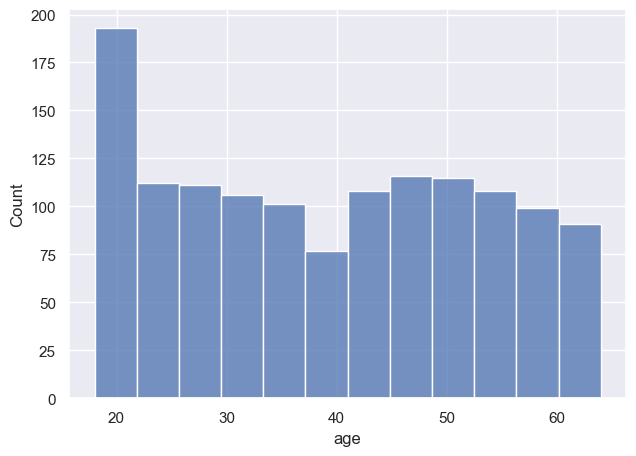

In [11]:
sns.histplot(df["age"])

##### The count of each gender we have in the data set:

In [12]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

C:\Users\User\anaconda4new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


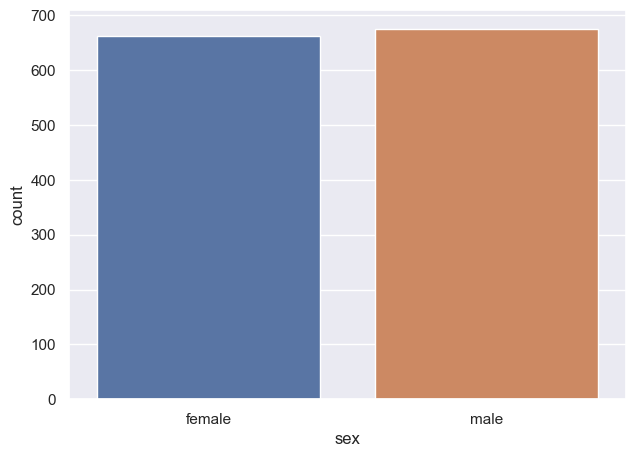

In [13]:
sns.countplot(df["sex"]);

##### The average insurnce charges by gender:

In [14]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [15]:
sex_grp = df.groupby("sex") 

sex_agg = sex_grp["charges"].mean().round()

sex_agg = sex_agg.reset_index()
sex_agg

,sex,charges
0,female,12570.0
1,male,13975.0


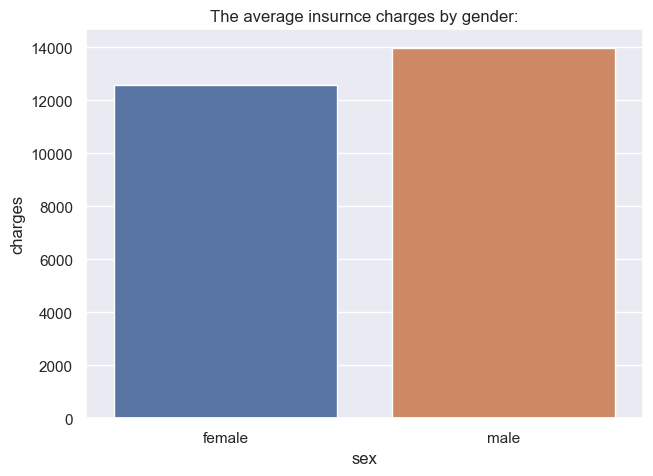

In [16]:
sns.barplot(x="sex",y="charges",data=sex_agg)
plt.title("The average insurnce charges by gender:");

##### The average age by gender:

In [17]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [18]:
age_agg = sex_grp["age"].mean().round()

age_agg = age_agg.reset_index()
age_agg

,sex,age
0,female,40.0
1,male,39.0


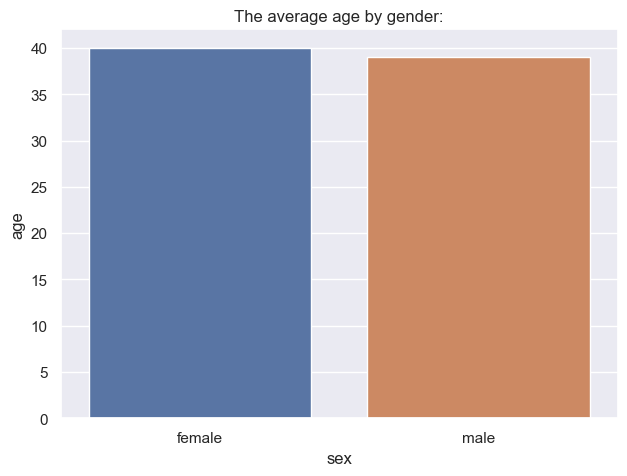

In [19]:
sns.barplot(x="sex",y="age",data=age_agg)
plt.title("The average age by gender:");

##### The average body mass index by gender:

In [20]:
bmi_agg = sex_grp["bmi"].mean().round()

bmi_agg = bmi_agg.reset_index()
bmi_agg

,sex,bmi
0,female,30.0
1,male,31.0


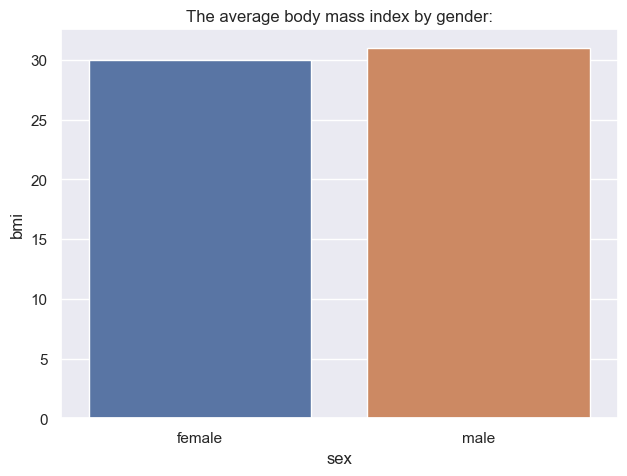

In [21]:
sns.barplot(x="sex",y="bmi",data=bmi_agg)
plt.title("The average body mass index by gender:");

##### The Distrubiotion of (BMI) column:

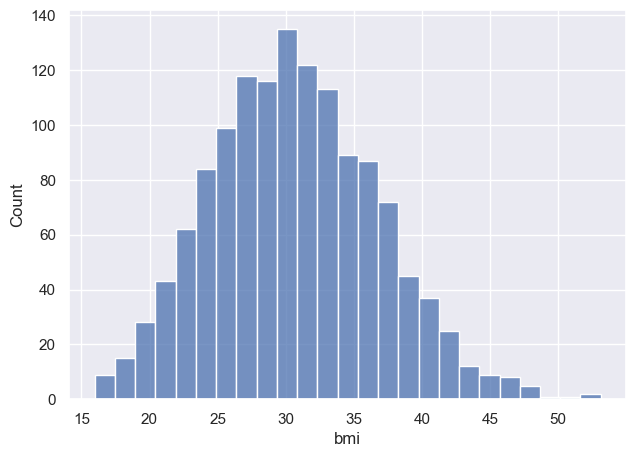

In [22]:
sns.histplot(df["bmi"]);

##### The count of people with children's:

In [23]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

C:\Users\User\anaconda4new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


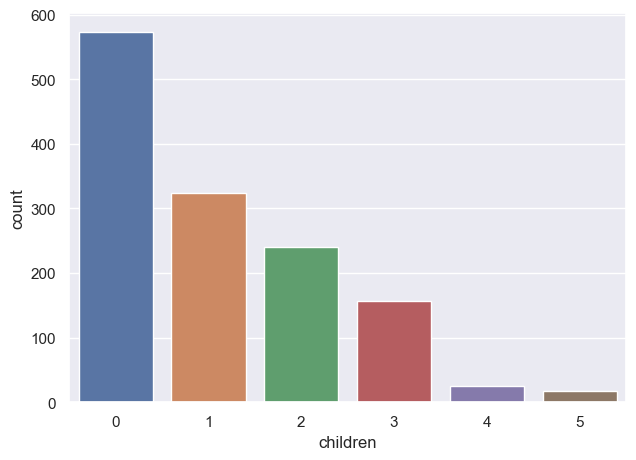

In [24]:
sns.countplot(df["children"]);

##### How many smokers and non smokers do we have?

In [25]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


C:\Users\User\anaconda4new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


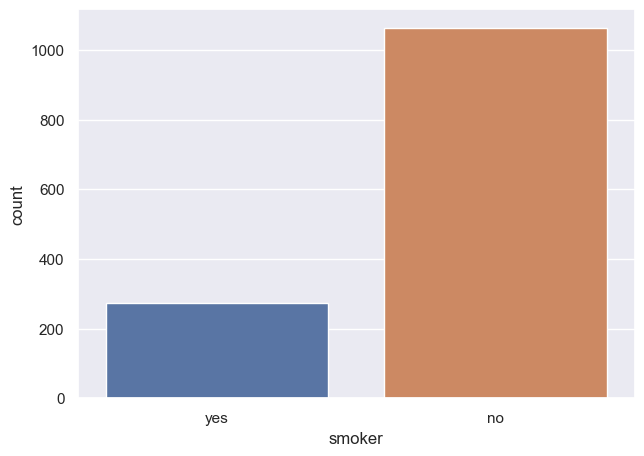

In [26]:
sns.countplot(df["smoker"]);

##### How many people do we have from each region?

C:\Users\User\anaconda4new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


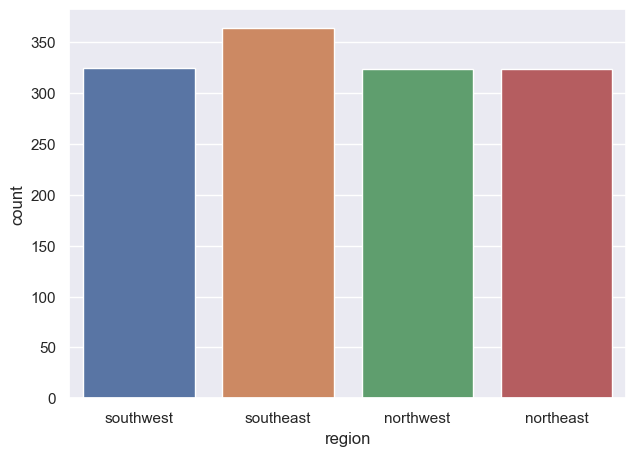

In [27]:
sns.countplot(df["region"]);

##### The Distrubiotion of (charges) column:

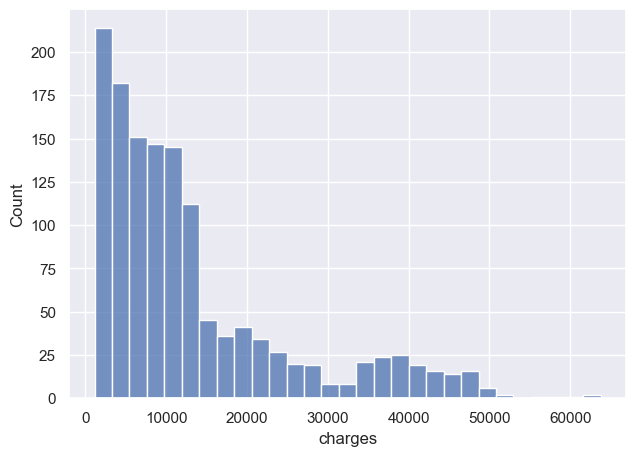

In [28]:
sns.histplot(df["charges"]);

## Preprocessing for machine learning:

##### Encoding categorical columns:

In [29]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [30]:
new_df = df

In [31]:

encoder = LabelEncoder()

new_df["sex"] = encoder.fit_transform(new_df["sex"])

new_df["smoker"] = encoder.fit_transform(new_df["smoker"])

##### Drop the "region" column:

In [32]:
new_df.drop(columns="region", axis=1,inplace=True)

In [33]:
# Check the dataframe after editing:
new_df.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


##### Transforming the distribution of the " Item_Outlet_Sales" column to increase the model performance:

In [34]:
new_df["charges"] = np.sqrt(new_df["charges"])

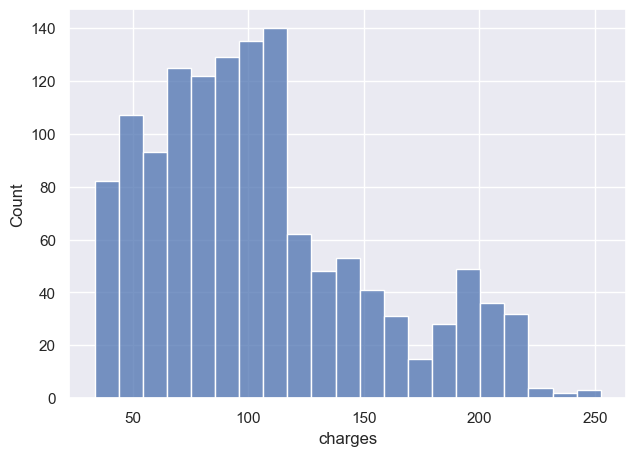

In [35]:
sns.histplot(new_df["charges"]);

##### Creat X and Y variables:

In [36]:
x = new_df.drop(columns="charges", axis=1)
y = new_df["charges"]

print(x)
print(y)

      age  sex     bmi  children  smoker
0      19    0  27.900         0       1
1      18    1  33.770         1       0
2      28    1  33.000         3       0
3      33    1  22.705         0       0
4      32    1  28.880         0       0
...   ...  ...     ...       ...     ...
1333   50    1  30.970         3       0
1334   18    0  31.920         0       0
1335   18    0  36.850         0       0
1336   21    0  25.800         0       0
1337   61    0  29.070         0       1

[1337 rows x 5 columns]
0       129.942002
1        41.539768
2        66.704288
3       148.271611
4        62.184043
           ...    
1333    102.958964
1334     46.967870
1335     40.371196
1336     44.810099
1337    170.708407
Name: charges, Length: 1337, dtype: float64


##### Creat train and test data:

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

## Training the machine learning model:
We will try multiple regression models and then choose the best one with the least error value.

In [38]:
lin_reg = LinearRegression()

lin_reg.fit(x_train,y_train)

LinearRegression()

##### Predicting on the training data and evaluating the model:

In [39]:
# Predicting
train_pred_1 = lin_reg.predict(x_train)

# Evaluating:
mae = metrics.mean_absolute_error(y_train,train_pred_1)
mse = metrics.mean_squared_error(y_train, train_pred_1)
rmse = np.sqrt(mse)

print(mae)
print(mse)
print(rmse)

15.478116225175773
522.0622715322526
22.848682052412837


##### Predicting on the test data and evaluating the model:

In [40]:
# Predicting
test_pred_1 = lin_reg.predict(x_test)

# Evaluating:
mae = metrics.mean_absolute_error(y_test,test_pred_1)
mse = metrics.mean_squared_error(y_test, test_pred_1)
rmse = np.sqrt(mse)


print(mae)
print(mse)
print(rmse)

14.158065931847412
459.956197906132
21.446589423638716


##### Decision Tree Regressor model from scikit-learn:

In [41]:
tree_reg = DecisionTreeRegressor(random_state=1)

tree_reg.fit(x_train,y_train)

DecisionTreeRegressor(random_state=1)

##### Predicting on the training data and evaluating the model:

In [42]:
# Predicting:
train_pred_2 = tree_reg.predict(x_train)

# evaluating:

mae = metrics.mean_absolute_error(y_train,train_pred_2)
mse = metrics.mean_squared_error(y_train, train_pred_2)
rmse = np.sqrt(mse)


print(mae)
print(mse)
print(rmse)

0.0
0.0
0.0


##### Predicting on the test data and evaluating the model:

In [43]:
# Predicting:
test_pred_2 = tree_reg.predict(x_test)

# Evaluating:
mae = metrics.mean_absolute_error(y_test,test_pred_2)
mse = metrics.mean_squared_error(y_test, test_pred_2)
rmse = np.sqrt(mse)


print(mae)
print(mse)
print(rmse)

14.745708067597429
879.0522890663733
29.64881598085113


##### Random Forest Regressor model from scikit-learn:

In [44]:
rand_reg = RandomForestRegressor(random_state=1)

rand_reg.fit(x_train,y_train)

RandomForestRegressor(random_state=1)

##### Predicting on the training data and evaluating the model:

In [45]:
# Predicting:
train_pred_3 = rand_reg.predict(x_train)

# Evaluating: 
mae = metrics.mean_absolute_error(y_train,train_pred_3)
mse = metrics.mean_squared_error(y_train, train_pred_3)
rmse = np.sqrt(mse)


print(mae)
print(mse)
print(rmse)

4.418215010456057
62.25260083988493
7.890031738838883


##### Predicting on the test data and evaluating the model:¶

In [46]:
# Predicting:
test_pred_3 = rand_reg.predict(x_test)

 # Evaluating:
mae = metrics.mean_absolute_error(y_test,test_pred_3)
mse = metrics.mean_squared_error(y_test, test_pred_3)
rmse = np.sqrt(mse)

print(mae)
print(mse)
print(rmse)

11.702345878141976
456.2989022972201
21.361154048815344


##### From what we see above, the best regression model was the third model, which achived the least error value

## Note:
This model will be deployed and available for end user very soon!!.

import pickle

filename = "Medical Insurance Cost Prediction.sav"

pickle.dump(rand_reg,open(filename,"wb"))